<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/attractor/Plot_results_attractor_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/attractor/attractor_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets that has been run through DCA pipeline:
* 3/17/24 setup


In [3]:
!git clone https://github.com/GergelyTuri/sleep.git

Cloning into 'sleep'...
remote: Enumerating objects: 859, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 859 (delta 134), reused 120 (delta 58), pack-reused 625
Receiving objects: 100% (859/859), 16.29 MiB | 23.90 MiB/s, done.
Resolving deltas: 100% (496/496), done.


In [4]:
%cd sleep
!pip install .

/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.11-py3-none-any.whl size=1011 sha256=7a3ac618e6cb2ee5f890eb5b44ff3144cd10a5c19a8e0bd21917283d3a933c06
  Stored in directory: /tmp/pip-ephem-wheel-cache-_s9bw8qf/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


In [ ]:
# %cd sleep
# !git pull

In [1]:
from google.colab import drive

drive.mount("/gdrive")

Mounted at /gdrive


In [5]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from sleep.src import google_drive

In [6]:
useful_data = google_drive.useful_datasets()
useful_data

,mouseID,day,sessionID,cellType,trialID,behavior_file,imaging_planes,eeg_data,sima folder,sleep_condition,note
0,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_GC1-001,GC,747,,1,,TSeries-07072021-0833_GC1-001_Cycle00001_Eleme...,,S/N is not so great
1,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_GC2-003,GC,745,5ht2afl05b_1_20210707120714_745_sleep.json,1,,TSeries-07072021-0833_GC2-003_Cycle00001_Eleme...,SD,"looks good, uploaded"
2,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_MC1-002,MC,740,5ht2afl05b_1_20210707110302_740_sleep.json,1,,TSeries-07072021-0833_MC1-002_Cycle00001_Eleme...,SD,
3,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_MC2-004,MC,749,5ht2afl05b_1_20210707131056_749_sleep.json,1,,TSeries-07072021-0833_MC2-004_Cycle00001_Eleme...,SD,nice
4,5HT2afl05b_1,7_12_SD2,TSeries-07122021-0901-002,GC_MC,880,,2,,,,
5,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_GC-001,GC,762,5ht2afl05b_2_20210706101536_762_sleep.json,1,,TSeries-07062021-0844_GC-001_Cycle00001_Elemen...,,S/N is not so great
6,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_MC-002,MC,761,5ht2afl05b_2_20210706112012_761_sleep.json,1,,TSeries-07062021-0844_MC-002_Cycle00001_Elemen...,,looks good
7,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_MC2-004,MC,760,5ht2afl05b_2_20210706133302_760_sleep.json,1,,TSeries-07062021-0844_MC2-004_Cycle00001_Eleme...,,"best, uploaded"
8,126031_5,11_23,TSeries-11232022-GC-GC-001,GC,874,126031_5_20221123154956_874_sleep.json,2,,TSeries-11232022-GC-GC-001.sima,,"good S/N, but very little NREM"
9,126031_5,11_23,TSeries-11232022-GC-MC-002,GC,876,126031_5_20221123163346_876_sleep.json,2,,TSeries-11232022-GC-MC-002.sima,,"very nice 2p, but ca signal craps off after ab..."


Test

In [7]:
paths_with_dcas = []

# Iterate through each row in the DataFrame
for index, row in useful_data.iterrows():
    # Construct the expected path using values from the current row
    exp_path = google_drive.return_exp_path(row['mouseID'], row['day'], row['sessionID'])

    # Use glob to find all files in the path that end with dcas.png
    dcas_files = glob.glob(os.path.join(exp_path, '*dcas.png'))

    # Check if the list of files is not empty
    if dcas_files:
        # Since we found at least one file that matches, add the exp_path to our list
        # Note: You could also consider adding the full paths of the found files instead
        paths_with_dcas.append(exp_path)


In [8]:
paths_with_dcas

['/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC1-002',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC2-004',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_12_SD2/TSeries-07122021-0901-002',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_GC-001',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC-002',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC2-004',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/sert52b_1/4_3_SD/TSeries-04032023-1323_SD_sess1-001',
 '/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/sert52b_5/4_3_SD/TSeries-04032023-1323-001',
 

In [11]:
def plot_images_grid(paths_with_dcas, savefig = False):
    # Filter paths to those containing a file ending with 'dca_3d.png'
    images_paths = []
    for path in paths_with_dcas:
        # Find files in the path that end with 'dca_3d.png'
        found_files = glob.glob(os.path.join(path, '*dca_3d.png'))
        images_paths.extend(found_files)

    # Determine the grid size (for simplicity, a square grid)
    num_images = len(images_paths)
    grid_size = int(np.ceil(np.sqrt(num_images)))

    # Create a figure to host the grid
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(20, 20))
    axs = axs.flatten()

    for ax, img_path in zip(axs, images_paths):
        # Open and display the image
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')  # Hide axes
        ax.set_title(os.path.basename(img_path))

    # Hide any unused subplots
    for ax in axs[len(images_paths):]:
        ax.axis('off')

    plt.tight_layout()
    if savefig:
        plt.savefig('plots.png')
    plt.show()



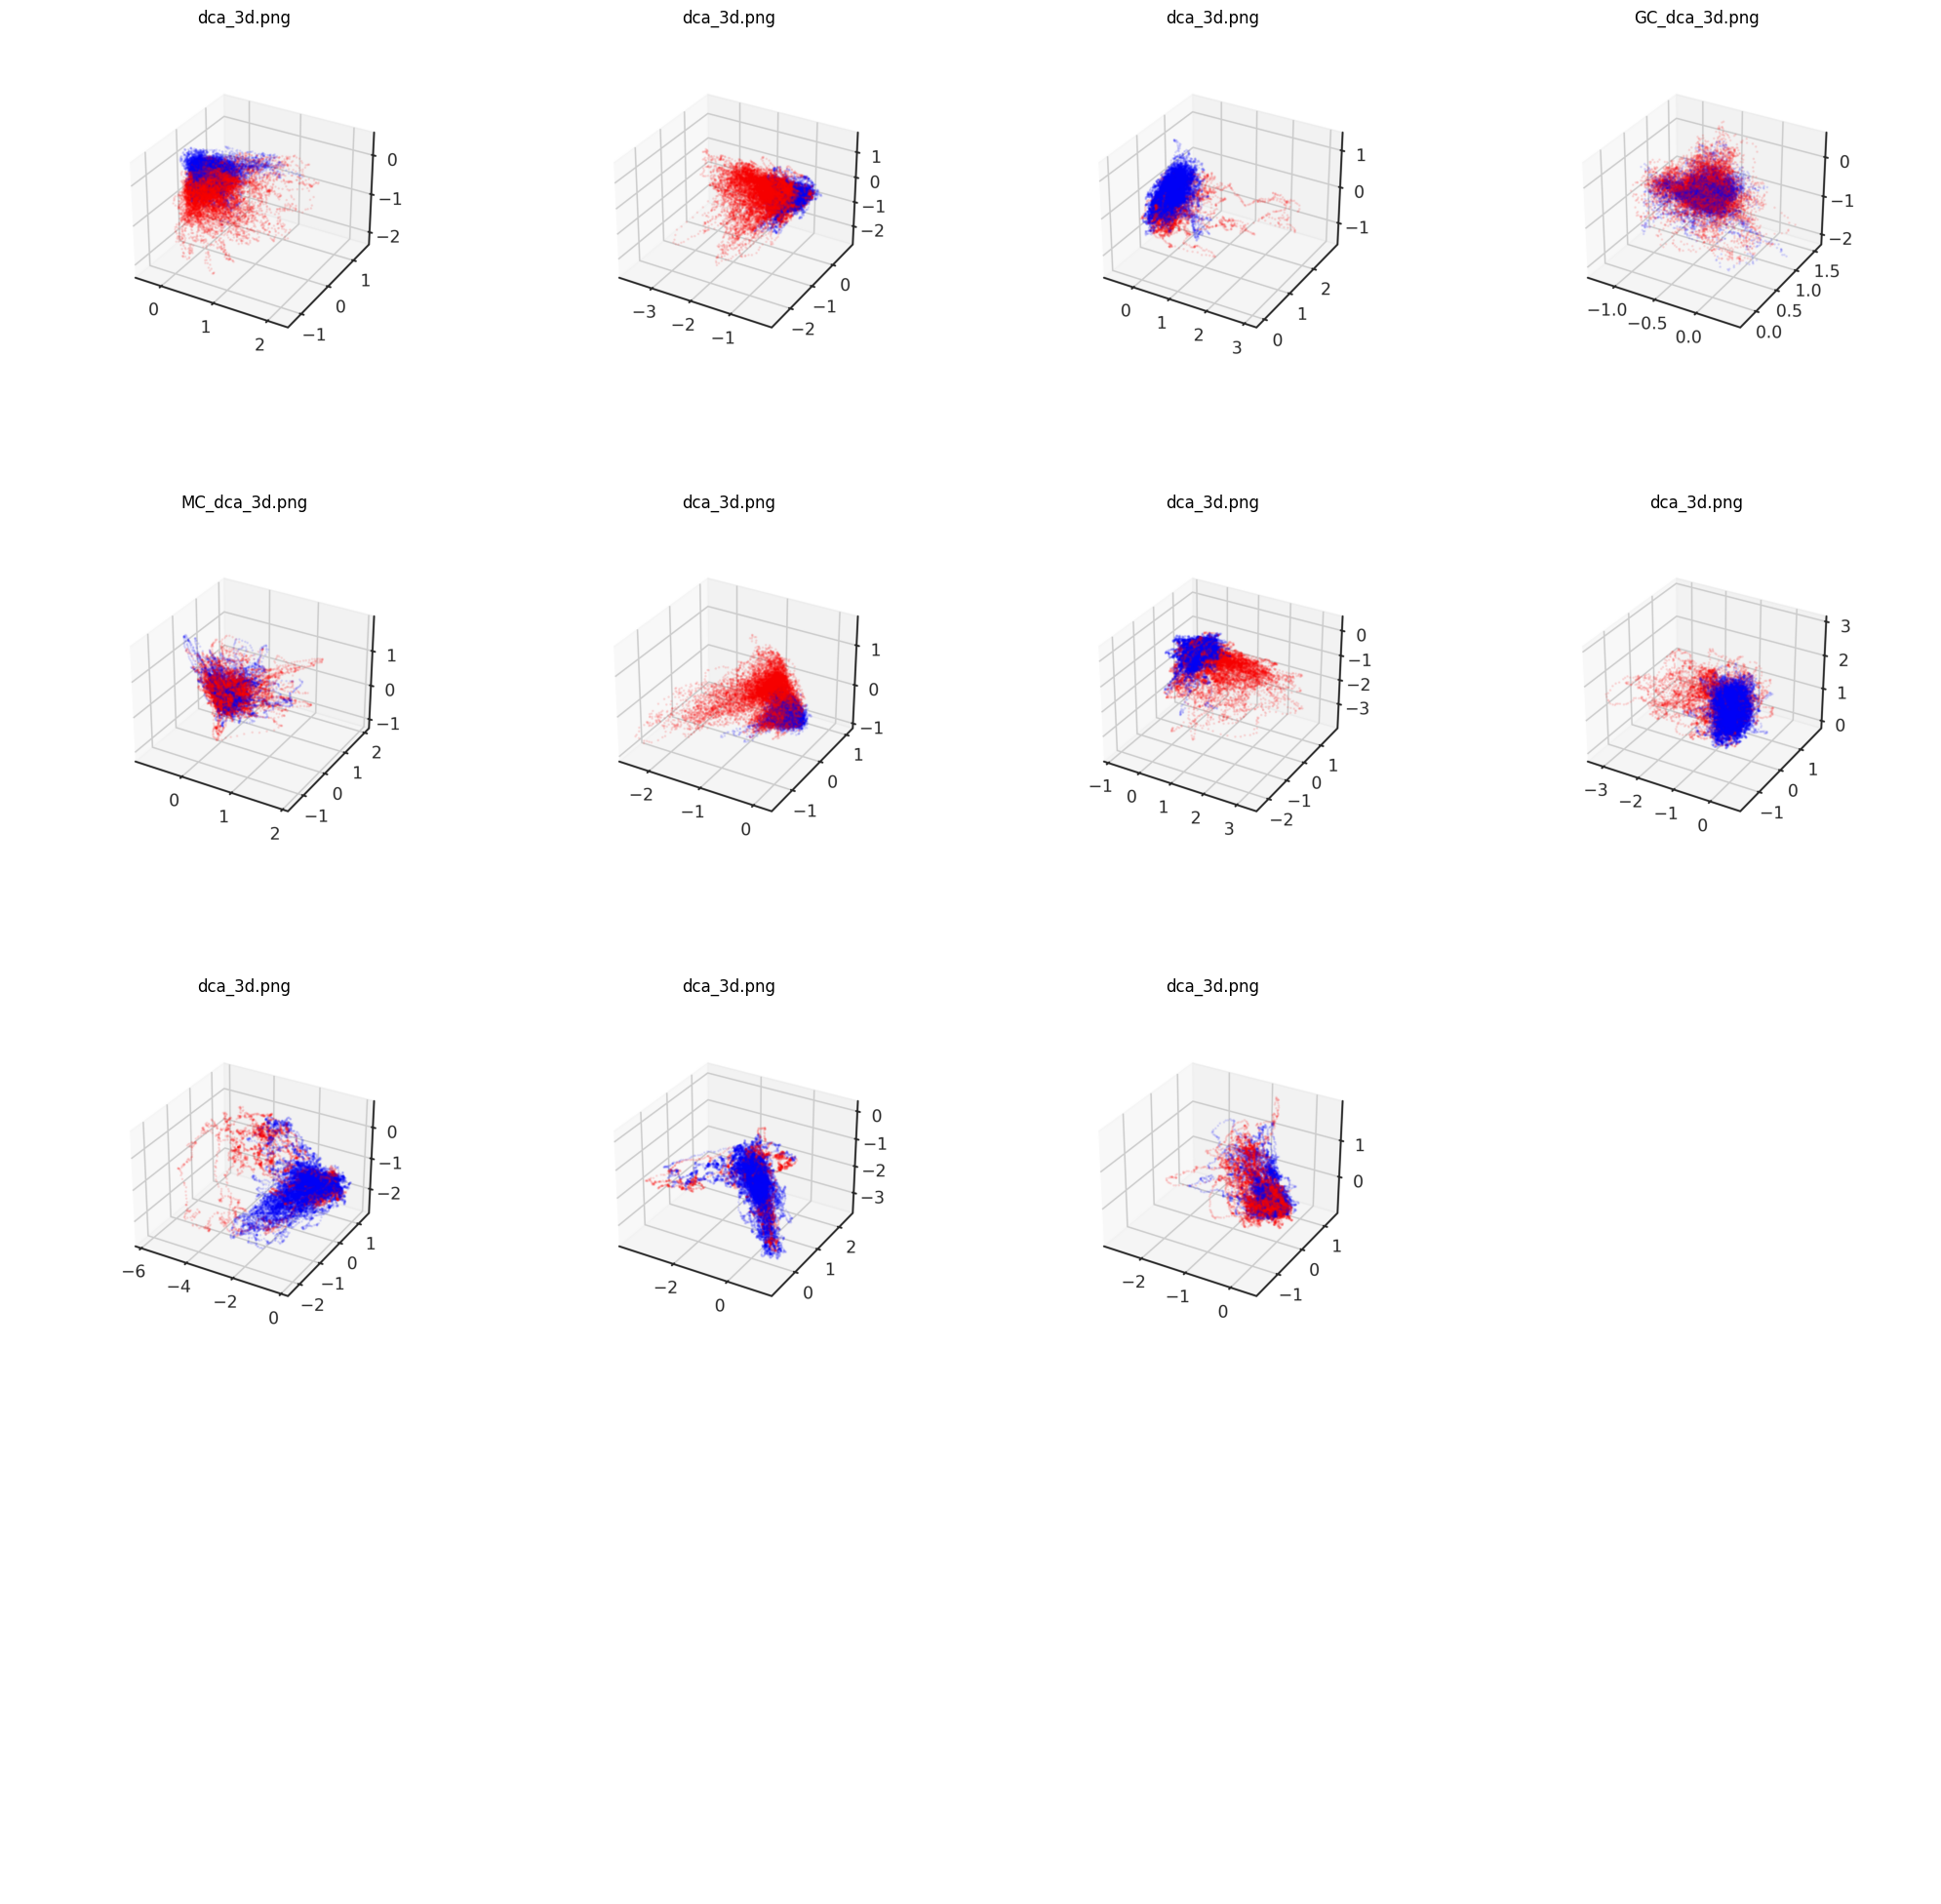

In [12]:
# Assuming paths_with_dcas is already populated
plot_images_grid(paths_with_dcas, savefig=True)

In [13]:
%pwd

'/content/sleep'